In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
auto=pd.read_csv(r"C:\Users\shajeer\Desktop\titanic_dataset.csv")
auto

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
auto.shape

(891, 12)

In [5]:
auto.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

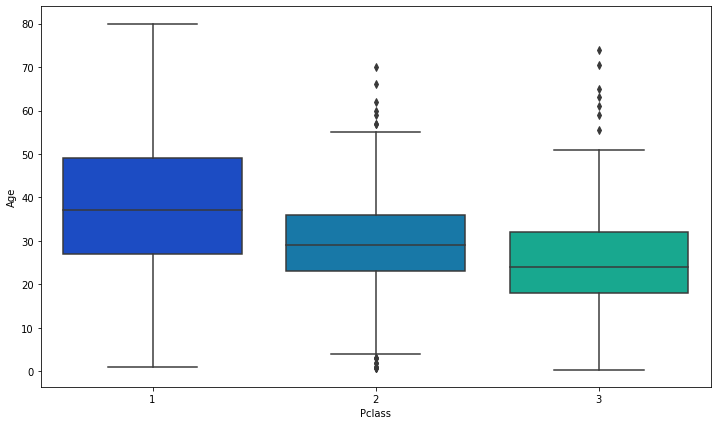

In [6]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=auto,palette='winter')

<AxesSubplot:xlabel='Survived', ylabel='count'>

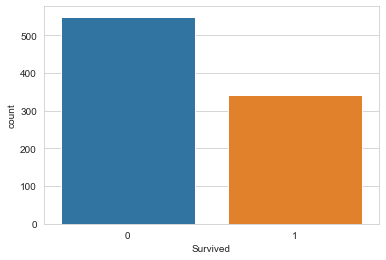

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=auto)

<AxesSubplot:xlabel='Survived', ylabel='count'>

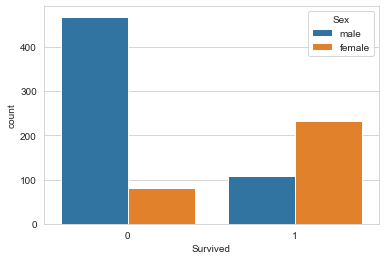

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=auto)

<AxesSubplot:xlabel='Survived', ylabel='count'>

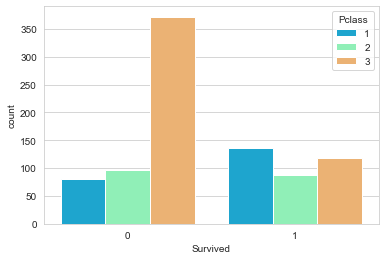

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=auto,palette='rainbow')

<AxesSubplot:xlabel='Age'>

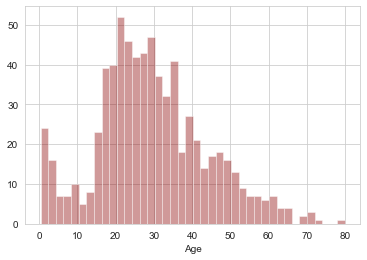

In [10]:
sns.distplot(auto['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

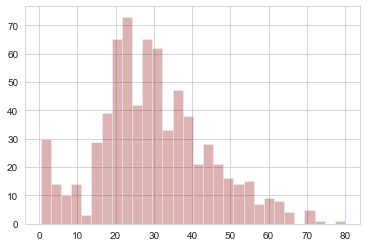

In [11]:
auto['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

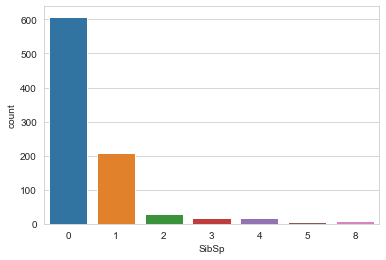

In [12]:
sns.countplot(x='SibSp',data=auto)

<AxesSubplot:>

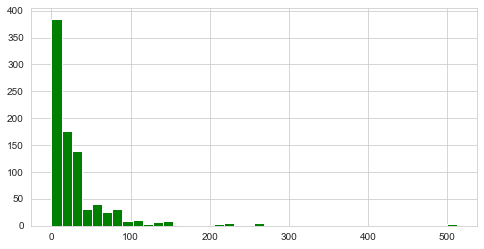

In [13]:
auto['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [14]:
auto.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
def miss(df):
    total = df.isnull().sum().sort_values(ascending = False)
    per = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    ps=pd.concat([total, per], axis=1, keys=['Total', 'Per'])
    ps= ps[ps["Per"] > 0]
    return ps
miss(auto)

,Total,Per
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


<AxesSubplot:>

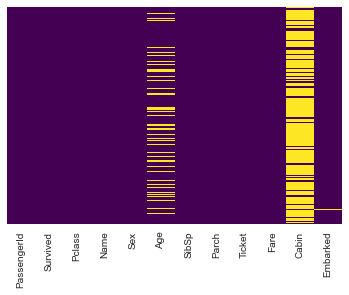

In [16]:
sns.heatmap(auto.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# handling missing value

In [17]:
auto['Age'].median()

28.0

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

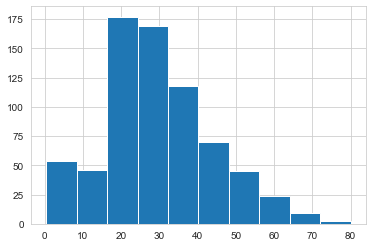

In [18]:
plt.hist(auto['Age'])

In [19]:
auto['Age'] = auto['Age'].fillna(auto['Age'].median())

In [20]:
auto.drop('Cabin',axis=1,inplace=True)

In [21]:
auto

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [22]:
auto['Embarked'] = auto['Embarked'].fillna(auto['Embarked'].mode()[0])
auto.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
auto['FamilySize'] = auto['SibSp'] + auto['Parch'] + 1

In [24]:

auto['FamilySize'] = auto['SibSp'] + auto['Parch'] + 1
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [25]:
auto['Title'] = auto['Name'].apply(get_title)

In [26]:
auto['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [27]:
auto['Title'] = auto['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
auto['Title'] = auto['Title'].replace('Mlle', 'Miss')
auto['Title'] = auto['Title'].replace('Ms', 'Miss')
auto['Title'] = auto['Title'].replace('Mme', 'Mrs')

In [28]:
auto['Fare_bin'] = pd.cut(auto['Fare'], bins=[0,7.91,14.45,32,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [29]:
drop_column = ['Age','Fare','Name','Ticket']
auto.drop(drop_column, axis=1, inplace = True)

In [30]:
auto

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Fare_bin
0,1,0,3,male,1,0,S,2,Mr,Low_fare
1,2,1,1,female,1,0,C,2,Mrs,high_fare
2,3,1,3,female,0,0,S,1,Miss,median_fare
3,4,1,1,female,1,0,S,2,Mrs,high_fare
4,5,0,3,male,0,0,S,1,Mr,median_fare
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,S,1,Rare,median_fare
887,888,1,1,female,0,0,S,1,Miss,Average_fare
888,889,0,3,female,1,2,S,4,Miss,Average_fare
889,890,1,1,male,0,0,C,1,Mr,Average_fare


In [31]:
#encoding

In [32]:
auto_en = pd.get_dummies(auto, columns = ['Sex','Title','Embarked','Fare_bin'],
                             prefix=['Sex','Title','Em_type','Fare_type'])

In [33]:
auto_en.shape

(891, 20)

In [34]:
#correlation

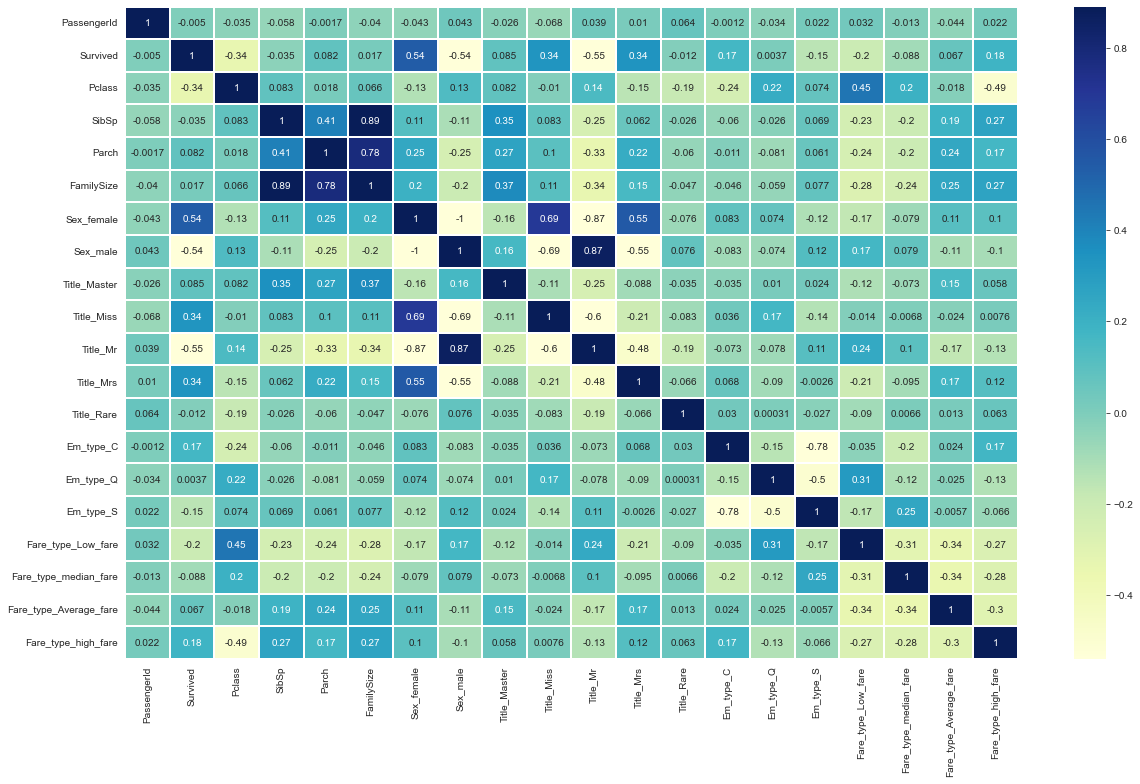

In [35]:
sns.heatmap(auto_en.corr(),vmin = -0.54, vmax= 0.89,annot = True,linewidth =0.2,cmap = 'YlGnBu')
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [36]:
X = auto_en.drop('Survived', axis=1)
y = auto_en['Survived']

In [37]:
#feature scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1)) 
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [39]:
y.value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


In [40]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.3)

In [41]:
X_train.shape

(623, 19)

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

GNB=GaussianNB()
GNB_model=GNB.fit(X_train , y_train)
y_pred6=GNB_model.predict(X_test)

In [43]:
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(y_pred6,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result

Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0,0.828025,0.828025,0.828025,157.000000
1,0.756757,0.756757,0.756757,111.000000
accuracy,0.798507,0.798507,0.798507,0.798507
macro avg,0.792391,0.792391,0.792391,268.000000
weighted avg,0.798507,0.798507,0.798507,268.000000


In [44]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
f1_score(y_pred6,y_test)

0.7567567567567567

In [45]:
print('Accuracy score: ',accuracy_score (y_pred6,y_test))

Accuracy score:  0.7985074626865671


In [46]:
#hyper tunning

In [47]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [49]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GNB_model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [50]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

In [51]:
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [52]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8059701492537313


In [53]:
#BernoulliNB

In [54]:
from sklearn.naive_bayes import BernoulliNB
BNB_model = BernoulliNB()
BNB_model = BNB_model.fit(X_train , y_train)
y_pred7=BNB_model.predict(X_test)

In [55]:
print("Results from Bernoulli Naive bayer are as below")
BNB_result = classification_report(y_pred7,y_test,output_dict=True)
BNB_result = pd.DataFrame(BNB_result).transpose()
BNB_result

Results from Bernoulli Naive bayer are as below


,precision,recall,f1-score,support
0,0.853503,0.827160,0.840125,162.000000
1,0.747748,0.783019,0.764977,106.000000
accuracy,0.809701,0.809701,0.809701,0.809701
macro avg,0.800625,0.805090,0.802551,268.000000
weighted avg,0.811675,0.809701,0.810403,268.000000


In [56]:
from sklearn.metrics import f1_score,accuracy_score 
f1_score(y_pred7,y_test)

0.7649769585253458

In [57]:
accuracy_score (y_pred7,y_test)

0.8097014925373134